# Numerical Methods Labs - Integration

We will introduce Python for Numerical Methods by looking at the numerical integration of a function - a central topic that we'll spend more time on later. In particular we'll look at the integrals

$$
\begin{aligned}
  I_1 &= \int_0^1 \text{d}x \, x^2 = \tfrac{1}{3}, \\ I_2 &= \int_0^1 \text{d}x \, \sqrt{1 - x^2} = \tfrac{\pi}{4}.
\end{aligned}
$$

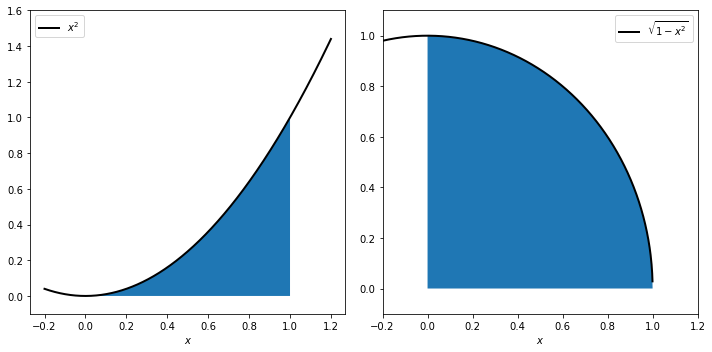

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

x = numpy.linspace(-0.2, 1.2, 1000)
x_integral = numpy.linspace(0.0, 1.0, 1000)

fig = pyplot.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.fill_between(x_integral, x_integral**2)
ax1.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax1.set_xlabel(r"$x$")
ax1.set_ylim(-0.1, 1.6)
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax2.fill_between(x_integral, numpy.sqrt(1.0-x_integral**2))
ax2.plot(x[x<=1.0], numpy.sqrt(1.0-x[x<=1.0]**2), 'k-', lw=2, label=r"$\sqrt{1-x^2}$")
ax2.set_xlabel(r"$x$")
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-0.1, 1.1)
ax2.legend()

fig.tight_layout()
pyplot.show()

## Spyder

We are going to use Spyder to write and run Python code. There are many other ways of doing so: if you have a different preference, then use it.

Open Spyder (using Python version **3**): it should look roughly like the figure.

![The spyder editor, with the key areas outlined and coloured.](figs/spyder-py3-reduced.png)

We will start by using the console in the bottom right.

## Simple numerical integration

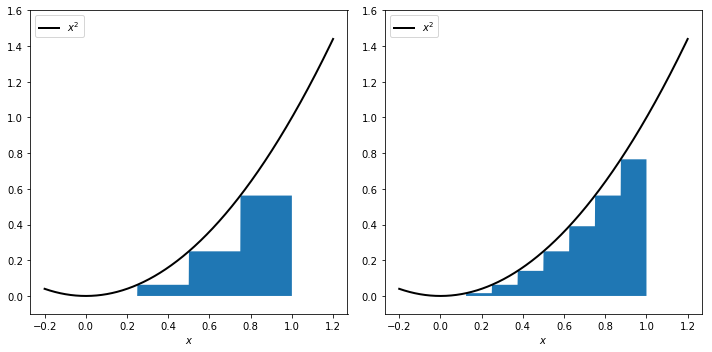

In [2]:
def stripes(f, x, Nstripes):
    """
    Show the stripes
    """
    boundaries = numpy.linspace(0.0, 1.0, Nstripes+1)
    integrand = numpy.zeros_like(x)
    for i in range(1, Nstripes):
        integrand += numpy.piecewise(x, 
                                     [x<boundaries[i], x>=boundaries[i]], 
                                     [0.0, f(boundaries[i]) - f(boundaries[i-1])])
    return integrand

f = lambda x : x**2

x = numpy.linspace(-0.2, 1.2, 1000)
x_integral = numpy.linspace(0.0, 1.0, 1000)

fig = pyplot.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.fill_between(x_integral, stripes(f, x_integral, 4))
ax1.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax1.set_xlabel(r"$x$")
ax1.set_ylim(-0.1, 1.6)
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(122)
ax2.fill_between(x_integral, stripes(f, x_integral, 8))
ax2.plot(x, x**2, 'k-', lw=2, label=r"$x^2$")
ax2.set_xlabel(r"$x$")
ax2.set_ylim(-0.1, 1.6)
ax2.legend(loc='upper left')

fig.tight_layout()
pyplot.show()

The region which we're integrating is split into $N$ strips - in the figure there are $4$ strips on the left and $8$ on the right. To height of each strip is the value of the function, $x^2$, at the left edge of the strip. The area of the strip is the height times the width, where the width is $1$ divided by the number of strips. The total area is the sum of the areas of all the strips. This total approximates the integral we want, $I_1$, which should be $1/3$.

Let's try this in the console for four strips.

In [3]:
(0**2 + (1/4)**2 + (2/4)**2 + (3/4)**2) * 1/4

0.21875

The height of each strip is given by the square of the coordinate location at the left edge: $0, \tfrac{1}{4}, \tfrac{2}{4}, \tfrac{3}{4}$ are the coordinate locations $x$ of the left edge, and the function is $x^2$. The Python command for taking powers uses two stars, `**`. The width of each strip is $1/4$. We see that Other mathematical operations - `+`, `-`, `*`, `/` - are all standard.

##### Note

If the results that you got don't match these, especially if the results that you got were exactly zero, check that you're using Python version **3**, not version **2**. There are very few differences that will affect us, but a crucial one is to do with dividing integers. In Python **2** the integer division `1/4` returns an integer, rounded down - in this case `0`. In Python **3** it returns a real number.

We see that the result isn't very accurate with four strips. It would be better with eight, or a hundred, or a million. But typing that by hand will be very tedious.

From now you should type in the editor, to keep the work available.

## Variables

What are the points and what are the function values? What is the width of the strip? These are meaningful quantities we reason about, and we want our code to reflect that. Rather than working with raw numbers, we want to give things names.

Let's go back to the case with four strips. In the editor, type

In [4]:
Nstrips = 4
width = 1/Nstrips
location_0 = 0
location_1 = 1 / Nstrips
location_2 = 2 / Nstrips
location_3 = 3 / Nstrips
integral_4 = (location_0**2+location_1**2+location_2**2+location_3**2)*width

Save the file (call it eg `lab1_integral1.py`: make sure the name has no spaces) and run it (press the green play button). You will see that nothing happens. To get output, you can type the variable name in the console:

In [5]:
integral_4

0.21875

Alternatively, you can print out the result to screen, either in the console or from the file. Edit your file to add (at the end) the line

```python
print(integral_4)
```

and re-run to see the output.

You can use the `print` function to add explanations which are often essential. For example

In [6]:
print("The result using", Nstrips, "strips is", integral_4)

The result using 4 strips is 0.21875


## Loops

Variables make it clearer what's going on, but repeating code (as in the definition of the `location_` variables) can easily lead to errors. When repeating things, make the computer do it by using a loop.

Open a new file (save it as `lab1_integral2.py`) and enter

In [7]:
Nstrips = 4
width = 1/Nstrips
integral_4 = 0
points = 0, 1, 2, 3
for point in points:
    print("At point", point)
    location = point / Nstrips
    height = location**2
    integral_4 = integral_4 + width * height
print("Final result is", integral_4)

At point 0
At point 1
At point 2
At point 3
Final result is 0.21875


Let's look at the key steps here. We have a number of points that we want to iterate over: `points = 0, 1, 2, 3`. The loop is defined by the `for` statement. It takes each member of the set `points` and sets the variable `point` to have that value, as shown by the values printed to the screen. It then executes the code statements that are indented for each member of the set, in this case adding up all the areas of the strips.

To define a loop, you must use the syntax `for thing in set:`, with the colon at the end of the line. The statements executed for each member of the set are those that are indented: use the TAB key for this. To have additional statements after the loop, stop indenting (or un-indent) the code, either use the delete key, or using Shift-TAB.

This still isn't ideal: we've typed out the `points` to loop over. As they are sequential integers, there is an easy way around this. Modify the code to remove the line defining `points` and to use the `range` function:

In [8]:
Nstrips = 4
width = 1/Nstrips
integral_4 = 0
for point in range(Nstrips):
    print("At point", point)
    location = point / Nstrips
    height = location**2
    integral_4 = integral_4 + width * height
print("Final result is", integral_4)

At point 0
At point 1
At point 2
At point 3
Final result is 0.21875


When used in a loop like this, `range(Nstrips)` generates every integer from `0` up to `Nstrips-1`. Note that it does **not** include the last value `Nstrips`.

We can now easily do more strips. Instead of repeating code, we can create a single function that we can re-use.

## Functions

We can now see a general pattern for integrating the function $x^2$. We want to be able to do this for any number of strips with a single command. We do this by defining our own function. In a new file, `lab1_integral3.py`, enter

In [9]:
def integral_1(Nstrips):
    """
    The first integral: integrate x**2 between 0 and 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        location = point / Nstrips
        height = location**2
        integral = integral + width * height
    
    return integral

At the bottom of the file we can call the function and check that we get the same results. Add to the file the line

```
print(integral_1(4))
```

and check that the output is as you expect.

Now, let's examine what we've done. We have *defined* the function `integral_1` using the line `def integral_1(Nstrips):`. The `def` keyword says that what follows will be a function. The next thing, up until the brackets, is the name of the function, in this case `integral_1`. This should obey the same rules as variable names. The names in the brackets are the names of the input variables. These are the names that will be used internal to the function. If there are no inputs, you still need the brackets (eg, `integral_1()`). If there is more than one input, you separate them by commas.

The line defining the function name must end with a colon. This is just like a `for` loop. What follows is also just like a `for` loop: the function is defined by the statements that are indented (using TAB) relative to the line defining the function.

Immediately after the line defining the function there is a string describing what the function does. You can print this string using:

In [10]:
help(integral_1)

Help on function integral_1 in module __main__:

integral_1(Nstrips)
    The first integral: integrate x**2 between 0 and 1.



Spyder will also display this help in the Object Inspector in the top right: type the name in the box and see what you get. Documenting your functions sensibly is a crucial part of programming.

Next we have the actual code. This is exactly the loop used to define the integral approximation, with the result assigned to the variable called `integral`. The final line is the only new thing. Once the calculation and the function has done its work, it has to say what information that it has calculated should be "sent back" to the caller. This is done using the `return` statement: all variables after the `return` will be output from the function. If you want to send back multiple variables, separate them with commas again.

We can now call the function for (much) larger numbers of strips and see how close we get to the correct answer of $1/3$:

In [11]:
print("One hundred strips:", integral_1(100))
print("One thousand strips:", integral_1(1000))
print("One million strips:", integral_1(1000000))

One hundred strips: 0.32835000000000014
One thousand strips: 0.3328335000000003
One million strips: 0.3333328333334962


## Using functions in functions

Our algorithm for integrating a function does not depend on the function being $x^2$. We could use anything, provided we can get the function to integrate ($f(x)$) into the function doing the integrating.

Open a new file (`lab1_integral4.py`) and enter the function to integrate, which we'll keep as $x^2$ for now:

In [12]:
def f_x_squared(x):
    """
    Square the input
    """
    return x**2

Also add the function to do the integration, which will now take the function to integrate as input:

In [13]:
def integral_2(f, Nstrips):
    """
    The general integral: f(x) between 0 and 1.
    """
    
    width = 1/Nstrips
    integral = 0
    for point in range(Nstrips):
        location = point / Nstrips
        height = f(location)
        integral = integral + width * height
    
    return integral

Finally, call the function and check it does the expected thing:

In [14]:
print(integral_2(f_x_squared, 4))

0.21875


## Using files in other files

It would be good to compare all these versions automatically, rather than remembering the answer given, or scrolling up and down. We can call functions from other files by using the `import` command, and then compare directly.

Create yet another file (`lab1_integral5.py`). First we will call the function in `lab1_integral3.py`, which was the final version integrating the fixed function $x^2$:

In [15]:
import lab1_integral3
print(lab1_integral3.integral_1(4))

0.21875


To call a function defined in a file, first `import` the file, then call the function using the "dot" notation `<file>.<function>`.

We can now do this again using the file `lab1_integral4.py` which contained the general version:

In [16]:
import lab1_integral4
print(lab1_integral4.integral_2(lab1_integral4.f_x_squared, 4))

0.21875


We see the names are getting very long: use TAB completion here to help!

We can now directly compare: re-arrange the file to read

In [17]:
import lab1_integral3
import lab1_integral4

specific = lab1_integral3.integral_1(4)
general = lab1_integral4.integral_2(lab1_integral4.f_x_squared, 4)

print(specific - general)

0.0


If the names get too long you can either `import` something directly `from` a file, or you can `import` something `as` a shorter name:

In [18]:
from lab1_integral3 import integral_1
import lab1_integral4 as l4

specific = integral_1(4)
general = l4.integral_2(l4.f_x_squared, 4)

print(specific - general)

0.0


## Packages

We can get code from our own files using `import`. We can also get code from files that others have written. There are many standard packages that we'll need to use.

Remember that at the start we also wanted to integrate

$$
  I_2 = \int_0^1 \text{d}x \, \sqrt{1 - x^2} = \tfrac{\pi}{4}.
$$

To do this, and to check the result, we need a function that can take the square root, and the value of $\pi$. Standard Python *does not* provide either of these:

In [19]:
print(sqrt(3))

NameError: name 'sqrt' is not defined

So we get them from the `numpy` package:

In [20]:
import numpy

print(numpy.sqrt(3))
print(numpy.pi)

1.73205080757
3.141592653589793


We can now create a function to compute $I_2$, and check its accuracy. In a new file (`lab1_integral6.py`), we can define the function to be integrated, `import` our general integrator, and check the accuracy of the result, by using the following code:

In [21]:
import numpy
from lab1_integral4 import integral_2

def f_sqrt(x):
    """
    Return the sqrt(1-x^2) as required for I_2
    """
    return numpy.sqrt(1 - x**2)

exact_I2 = numpy.pi / 4

print("Error in integral using 4 strips,", integral_2(f_sqrt, 4) - exact_I2)
print("Error in integral using 100 strips,", integral_2(f_sqrt, 100) - exact_I2)
print("Error in integral using 10000 strips,", integral_2(f_sqrt, 10000) - exact_I2)

Error in integral using 4 strips, 0.0885291036282
Error in integral using 100 strips, 0.00470609454731
Error in integral using 10000 strips, 4.9706005381e-05


## `numpy`

We are going to work with vectors and matrices a lot. The Python package that makes this easier is `numpy`. We have used it above to get particular functions. We can use it to re-write (again!) our integration code to be more general and easier to read.

Our method was:
* take an interval $[a, b]$ (originally $[0, 1]$)
* split it into $N$ strips
* compute the width $w$ of each strip
* compute the coordinate location of the left edge of each strip $x_i$
* compute the height of each strip ($f(x_i)$)
* compute the area of each strip ($w \times f(x_i)$)
* add them all up.

We can use specific `numpy` functions to do this more clearly. In a new file enter

In [22]:
import numpy

def integral_3(f, a, b, Nstrips):
    locations, w = numpy.linspace(a, b, Nstrips, endpoint=False, retstep=True)
    heights = f(locations)
    areas = w * heights
    return numpy.sum(areas)

Before we explain this, check that it produces the same answer as before, by adding the code for $I_2$ as above:

In [23]:
def f_sqrt(x):
    """
    Return the sqrt(1-x^2) as required for I_2
    """
    return numpy.sqrt(1 - x**2)

exact_I2 = numpy.pi / 4

print("Error in integral using 4 strips,", integral_3(f_sqrt, 0, 1, 4) - exact_I2)
print("Error in integral using 100 strips,", integral_3(f_sqrt, 0, 1, 100) - exact_I2)
print("Error in integral using 10000 strips,", integral_3(f_sqrt, 0, 1, 10000) - exact_I2)

Error in integral using 4 strips, 0.0885291036282
Error in integral using 100 strips, 0.00470609454731
Error in integral using 10000 strips, 4.97060053823e-05


Our new `numpy`-based code `integral_3` takes the interval as input (via the endpoints `a` and `b`).

It then uses the `numpy` function `linspace` to return linearly spaced points starting at `a`, finishing at `b`, and using `Nstrips` points. It does *not* include the endpoint (`endpoint=False`) as we don't want a strip whose left edge is at `b`. It also returns the width of the strips (`retstep=True`). Note how, if a function `return`s more than one thing, there are multiple variables before the equals.

It next computes the heights from the locations. Even though there is a vector of locations, it can do this in one operation - this works because `locations` is a `numpy` array. Similarly, in computing the areas, it does this in one operation. When working with `numpy` arrays - vectors, matrices, and higher dimensional objects - we can usually do things in one go like this.

Finally we call the `numpy` function `sum` to add up all the areas.